<a href="https://colab.research.google.com/github/Salamit/fast-ai/blob/master/Hanfu_vs_Kimono_vs_Hanbok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#This notebook spots the differences between a woman wearing the 'Hanfu' (a Chinese traditional cloth), 'Hanbok' (a South Korean traditional cloth) and the 'Kimono' (a Japanese traditional cloth).
#This is part of exercise 1 of fast.ai and created using notes here: https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb
#March 15, 2019

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
# bs = 16

# **Downloading the Images**

**Hanfu**

In [0]:

folder = 'hanfu'
file ='hanfu.csv'

In [0]:
path = Path('data/clothes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [14]:
#downloading hanfu images
download_images(path/file, dest, max_pics=200, max_workers=0)

Error https://www.aokdress.com/image/cache/data/201708/red-halloween-costumes-china-hanfu-traditional-ancient-chinese-costume-women-chinese-folk-dance-wear-tang-princess-queen-cosplay-7176-600x600.jpg HTTPSConnectionPool(host='www.aokdress.com', port=443): Read timed out. (read timeout=4)


**Kimono**

In [0]:
folder = 'kimono'
file ='kimono.csv'

In [0]:
path = Path('data/clothes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [17]:
download_images(path/file, dest, max_pics=200)

**Hanbok**

In [0]:
folder = 'hanbok'
file ='urls_hanbok.txt'

In [0]:
path = Path('data/clothes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [20]:
download_images(path/file, dest, max_pics=200)

Error https://img.washingtonpost.com/rf/image_480w/2010-2019/WashingtonPost/2010/11/09/Foreign/Images/2010-11-09T084401Z_01_LJW10_RTRIDSP_3_KOREA.jpg?uuid=-2cCrOxXEd-wgW4eBrGc2w HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)

 Download of http://reveriechaser.com/wp-content/uploads/2017/09/hanbok-traditional-dress-woman.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p /root/.fastai/data
$ cd /root/.fastai/data
$ wget -c http://reveriechaser.com/wp-content/uploads/2017/09/hanbok-traditional-dress-woman.jpg
$ tar -zxvf hanbok-traditional-dress-woman.jpg

And re-run your code once the download is successful

Error http://www.lifeinkorea.com/pictures/tcs10.jpg HTTPConnectionPool(host='www.lifeinkorea.com', port=80): Max retries exceeded with url: /pictures/tcs10.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f2183fab908>, 'Connection to www.lifeinkorea.com timed out. (connect timeout=4)

In [21]:
path.ls()

[PosixPath('data/clothes/hanfu.csv'),
 PosixPath('data/clothes/kimono.csv'),
 PosixPath('data/clothes/kimono'),
 PosixPath('data/clothes/urls_hanbok.txt'),
 PosixPath('data/clothes/hanfu'),
 PosixPath('data/clothes/hanbok')]

In [0]:
classes = ['hanfu','kimono','hanbok'] 

In [23]:
#Removing any images that don't open
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

hanfu


cannot identify image file <_io.BufferedReader name='data/clothes/hanfu/00000144.jpg'>
kimono


cannot identify image file <_io.BufferedReader name='data/clothes/kimono/00000123.jpg'>
cannot identify image file <_io.BufferedReader name='data/clothes/kimono/00000102.jpg'>
cannot identify image file <_io.BufferedReader name='data/clothes/kimono/00000125.jpg'>
cannot identify image file <_io.BufferedReader name='data/clothes/kimono/00000108.jpg'>
cannot identify image file <_io.BufferedReader name='data/clothes/kimono/00000178.jpg'>
cannot identify image file <_io.BufferedReader name='data/clothes/kimono/00000148.jpg'>
cannot identify image file <_io.BufferedReader name='data/clothes/kimono/00000078.jpg'>
cannot identify image file <_io.BufferedReader name='data/clothes/kimono/00000168.jpg'>
hanbok


cannot identify image file <_io.BufferedReader name='data/clothes/hanbok/00000149.jpg'>
cannot identify image file <_io.BufferedReader name='data/clothes/hanbok/00000183.jpg'>
cannot identify image file <_io.BufferedReader name='data/clothes/hanbok/00000088.jpg'>


# **Viewing the Data**

In [0]:
#Cleaning the data
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=bs, num_workers=4).normalize(imagenet_stats)

In [25]:
#looking at the classes of clothes that exist
data.classes

['hanbok', 'hanfu', 'kimono']

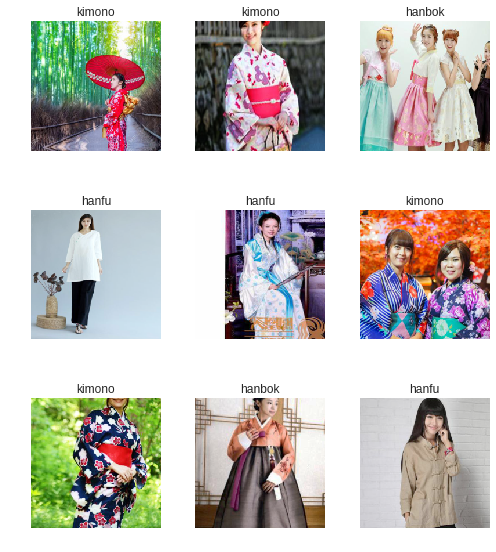

In [26]:
data.show_batch(rows=3, figsize=(7,8))

In [27]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['hanbok', 'hanfu', 'kimono'], 3, 468, 116)

# **Training the Model**

In [28]:
#fast.ai lesson uses create_cnn. I will replace cnn_learner with create_cnn
learn = create_cnn(data, models.resnet34, metrics=error_rate)  

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 63328768.00it/s]


In [29]:
#learn.model. This is pulled from the fast.ai process of lesson 1 https://colab.research.google.com/drive/1uWWwJ5_E5zpixqJtP8zNWBYYNxjN1qys?authuser=1#scrollTo=M-gxJmGLEWhH

learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [30]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.279988,0.699605,0.293103,03:06
1,0.924534,0.467154,0.172414,03:07
2,0.717372,0.454953,0.163793,03:06
3,0.596801,0.441293,0.155172,03:06


In [0]:
#saving the model
learn.save('stage-1')

In [0]:
#Lets make our model better by training the whole model. 
learn.unfreeze()

In [33]:
#learning rate finder
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


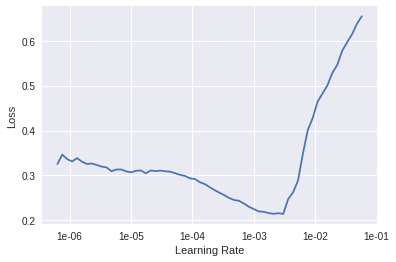

In [34]:

#plot our learning rate
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.327630,0.333011,0.129310,04:14
1,0.271873,0.310733,0.112069,04:15


In [0]:
learn.save('stage-2')


# **Interpretation**

In [0]:
learn.load('stage-2');

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

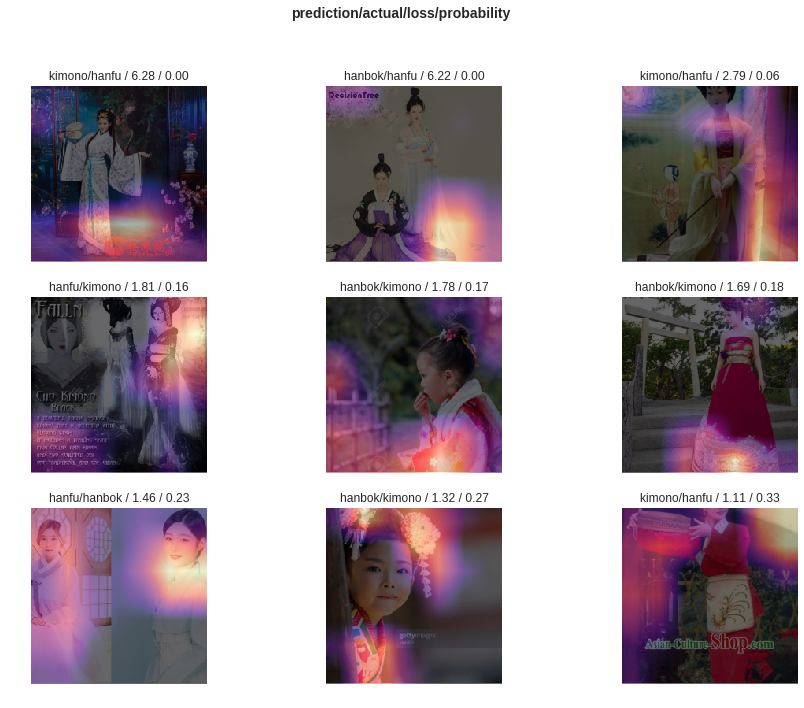

In [39]:
#plot the losses
interp.plot_top_losses(9, figsize=(15,11))

In [40]:
#doc provides us with the documentation for the method. 
doc(interp.plot_top_losses)

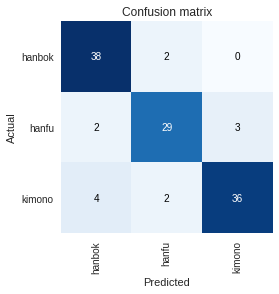

In [41]:
interp.plot_confusion_matrix()

In [42]:
interp.most_confused(min_val=2)#most confused gets out of the confusion matrix those categories that were wrongly predicted. 
#For example, it should have predictedd a British_shorthair but it predicted the Russian_blue and this happed 5 times.

[('kimono', 'hanbok', 4),
 ('hanfu', 'kimono', 3),
 ('hanbok', 'hanfu', 2),
 ('hanfu', 'hanbok', 2),
 ('kimono', 'hanfu', 2)]

# **Cleaning Up**

Using the ImageCleaner widget, from fastai.widgets we can clean our images by removing those that don't belong because errors in prediction could also be because the images with top losses don't belong.

In [0]:
from fastai.widgets import *

First we get the paths of our top_losses. To do this, we use '.from_toplosses' method. We then feed the top losses indexes and the data set that corresponds to ImageCleaner

The widget will not delete images from the disk. Rather it will create a new csv file called cleaned.csv from which a new ImageDataBunch can be created with correct labels which can be used to continue training your model. 

In [0]:
#gettting the path of our top losses.
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [45]:
db = (ImageList.from_folder(path)
                   .no_split()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:171: UserWarning: `no_split` is deprecated, please use `split_none`.
  warn("`no_split` is deprecated, please use `split_none`.")


In [0]:
#Then we create a new learner to use our new databunch with all the images.
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [48]:

ds, idxs = DatasetFormatter().from_similars(learn_cln)


Getting activations...


Computing similarities...


SyntaxError: ignored

# **Putting your model in production**

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

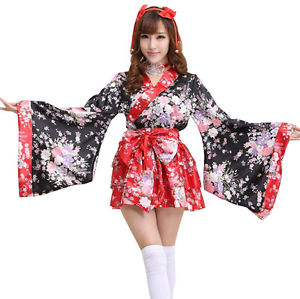

In [52]:
img = open_image(path/'kimono'/'00000021.jpg')
img

In [0]:
learn = load_learner(path)

In [54]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category kimono

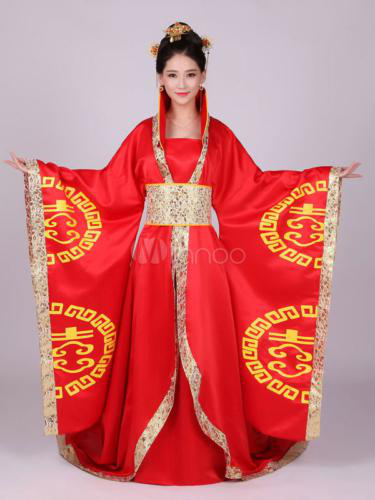

In [55]:
img = open_image(path/'hanfu'/'00000021.jpg')
img

In [0]:
learn = load_learner(path)

In [57]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category hanfu

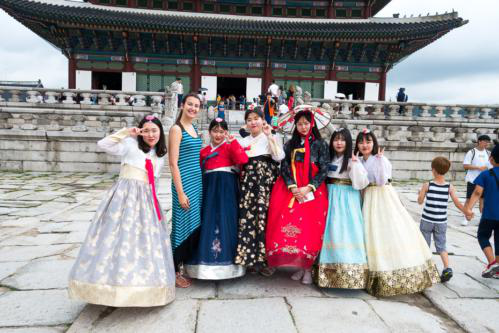

In [58]:
img = open_image(path/'hanbok'/'00000021.jpg')
img

In [0]:
learn = load_learner(path)

In [60]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category hanbok